In [1]:
using Pkg, Revise, VegaLite
Pkg.activate("../.")
using LightGraphs, GraphPlot, SimpleWeightedGraphs, LinearAlgebra, DataFrames, Random, MetaGraphs
using VegaGraphs

  Activating environment at `~/MEGA/EMAp/VegaGraphs.jl/Project.toml`


In [2]:
Random.seed!(7)
incidence = rand([0,1],10,20)
m = incidence'*incidence
m[diagind(m)] .= 0.0
g = SimpleWeightedGraph(m)
g = SimpleGraph(m)
g = MetaGraph(g)

{20, 186} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [3]:
random_ew = zeros(length(collect(edges(g)))*2);
for (i,e) in enumerate(edges(g))
    random_ew[2*i-1] = rand(1:8) 
    random_ew[2*i] = random_ew[2*i-1]
end

In [5]:
g

{20, 186} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

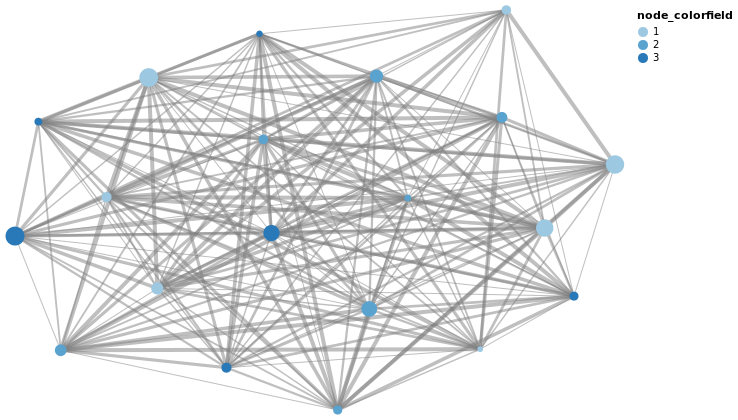

In [8]:
random_nodecolor = rand([1,2,3],20)
random_nodesize  = rand(20)
p = VegaGraphs.graphplot(g,tooltip=true,ew=true,
    node_label=false,node_colorfield=random_nodecolor,
    node_sizefield=random_nodesize,
    node_sizefieldtype="q",
    node_colorfieldtype="o",
    edge_weightfield=random_ew
)